In [31]:
from scipy.cluster.hierarchy import dendrogram
import os
os.environ["OMP_NUM_THREADS"] = '3'
import numpy as np
import matplotlib . pyplot as plt
import time
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
path = './artificial/'
%run "Utils.ipynb"

In [32]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix) #, **kwargs)

In [33]:
def print_clustering(model,datanp,name):
    print("---------------------------------------")
    print("Affichage données initiales            "+ str(name))
    f0 = datanp[:,0] # tous les élements de la première colonne
    f1 = datanp[:,1] # tous les éléments de la deuxième colonne
    
    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    print("------------------------------------------------------")
    print("Affichage après appel KMeans pour une valeur de k fixée")
    labels = model.labels_
    
    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(model.n_clusters))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()

## Test différentes variantes de 'linkage'

In [34]:
variantes_linkage = ["single", "complete", "average", "ward"]

### square1.arff 

---------------------------------------
Affichage données initiales            square1.arff


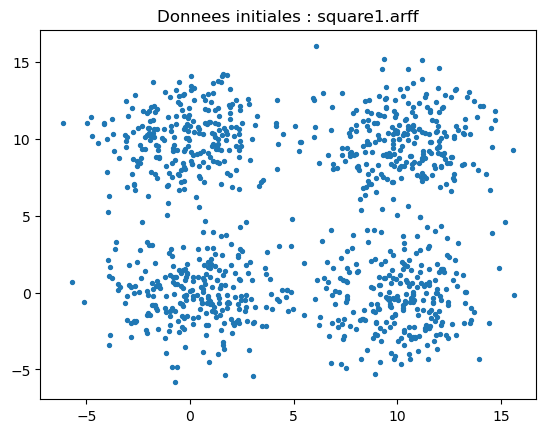

In [35]:
name= 'square1.arff'
datanp = get_data('./artificial/', name )
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

---------------------------------------------------
single linkage


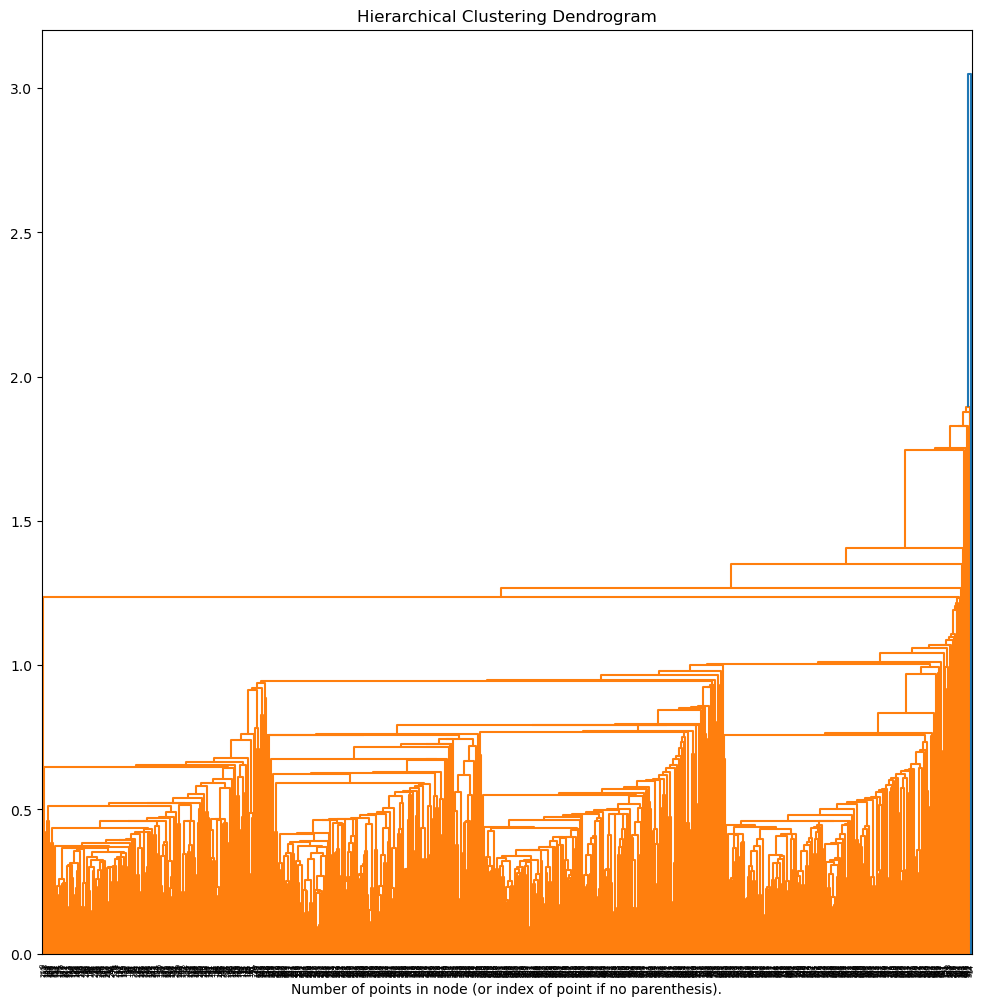

Temps de calcul pour la variante single : 17.35 ms
---------------------------------------------------
complete linkage


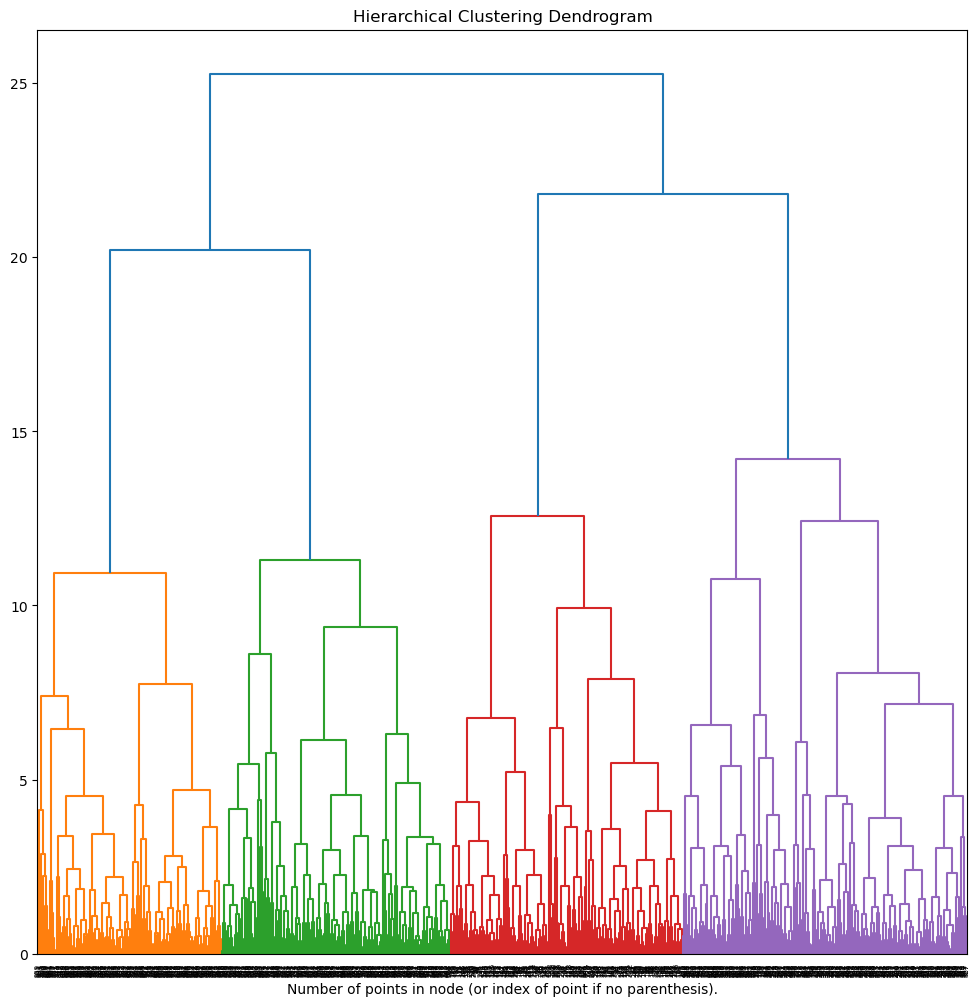

Temps de calcul pour la variante complete : 21.07 ms
---------------------------------------------------
average linkage


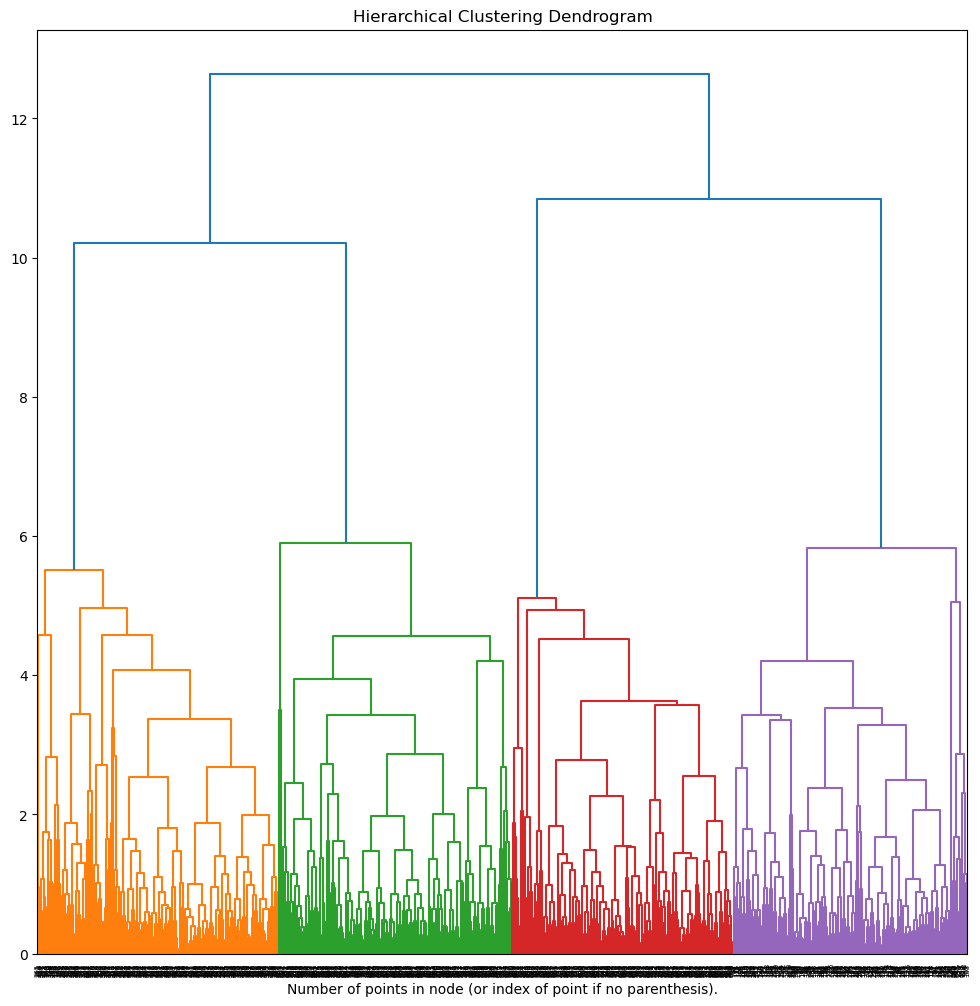

Temps de calcul pour la variante average : 18.97 ms
---------------------------------------------------
ward linkage


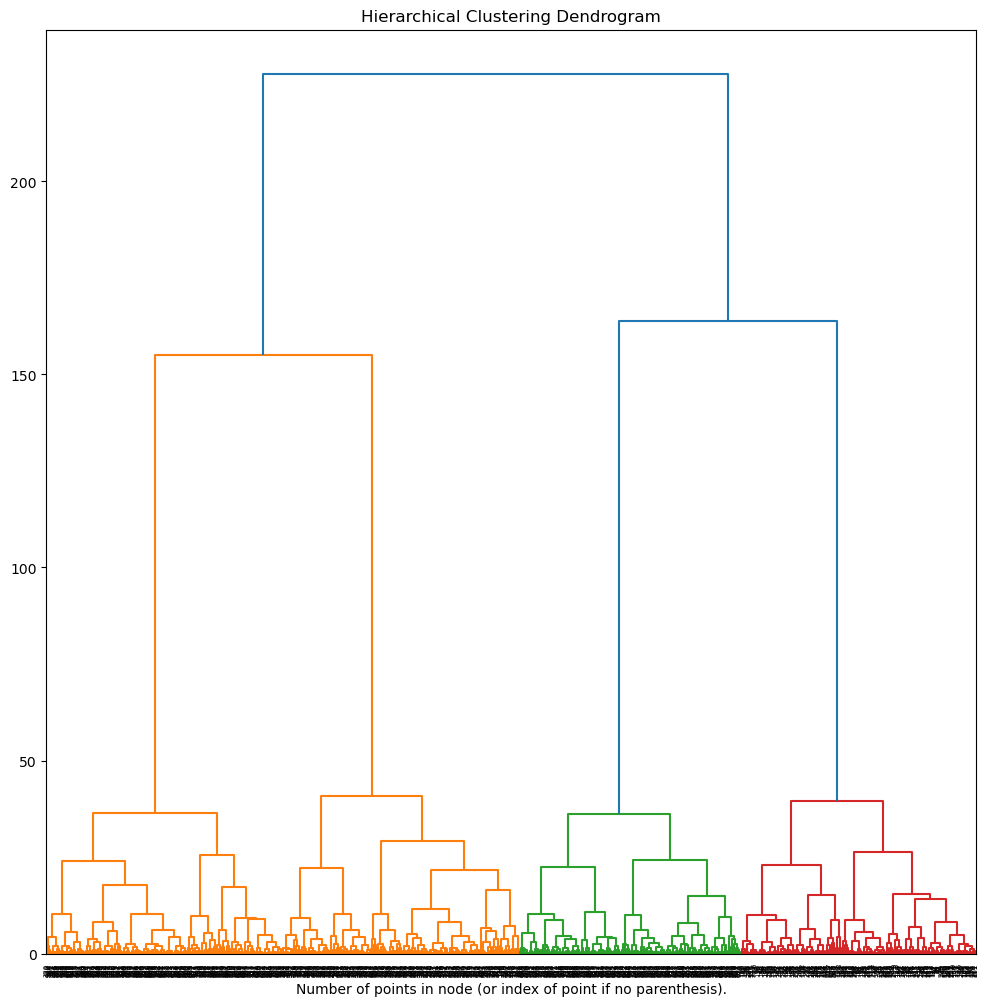

Temps de calcul pour la variante ward : 16.61 ms


In [36]:
name = "square1.arff"
datanp = get_data(path,name)
for link in variantes_linkage:
    print('---------------------------------------------------');
    print(f"{link} linkage")
    # setting distance_threshold=0 ensures we compute the full tree.
    time_start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=0, linkage=link, n_clusters=None)

    model = model.fit(datanp)
    time_stop = time.time()
    plt.figure(figsize=(12, 12))
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top p levels of the dendrogram
    plot_dendrogram(model) #, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    print(f"Temps de calcul pour la variante {link} : {(round((time_stop - time_start)*1000,2))} ms" )
    

### xclara.arff

---------------------------------------------------
single linkage


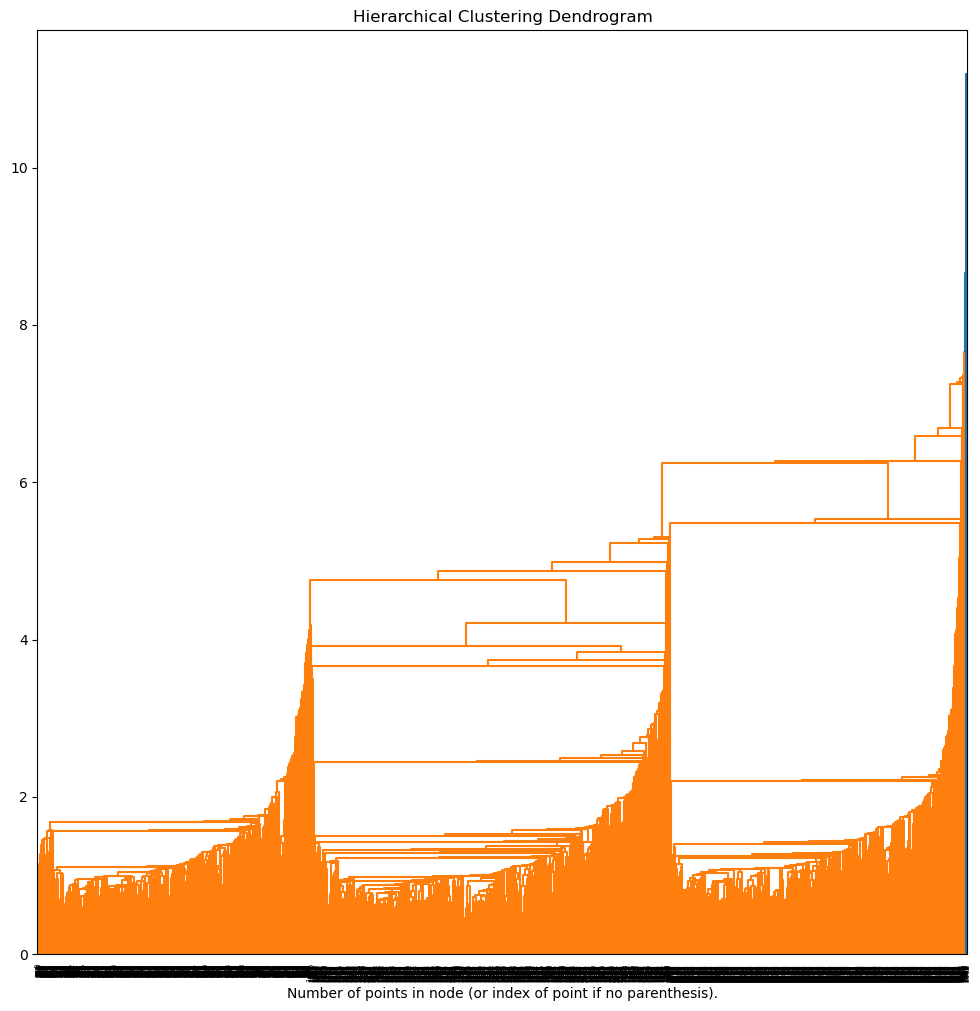

Temps de calcul pour la variante single : 70.13 ms
---------------------------------------------------
complete linkage


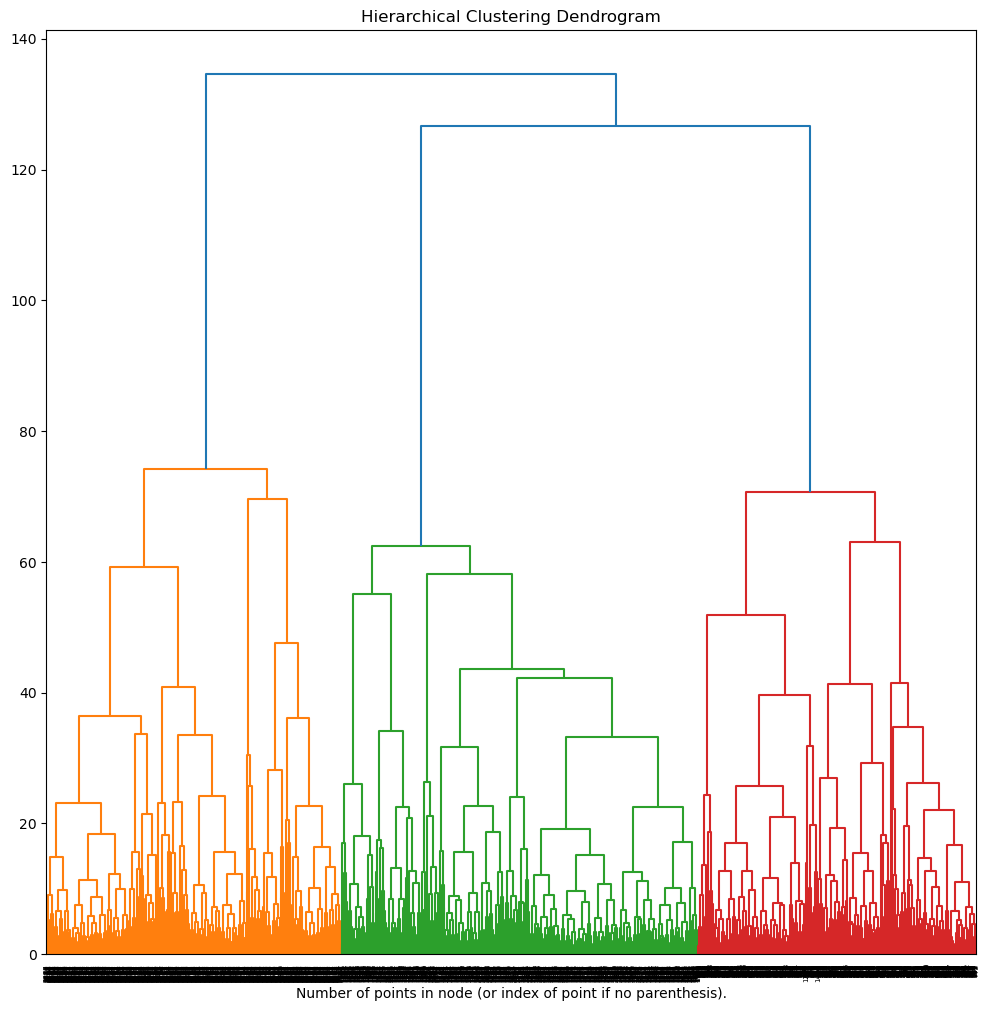

Temps de calcul pour la variante complete : 180.21 ms
---------------------------------------------------
average linkage


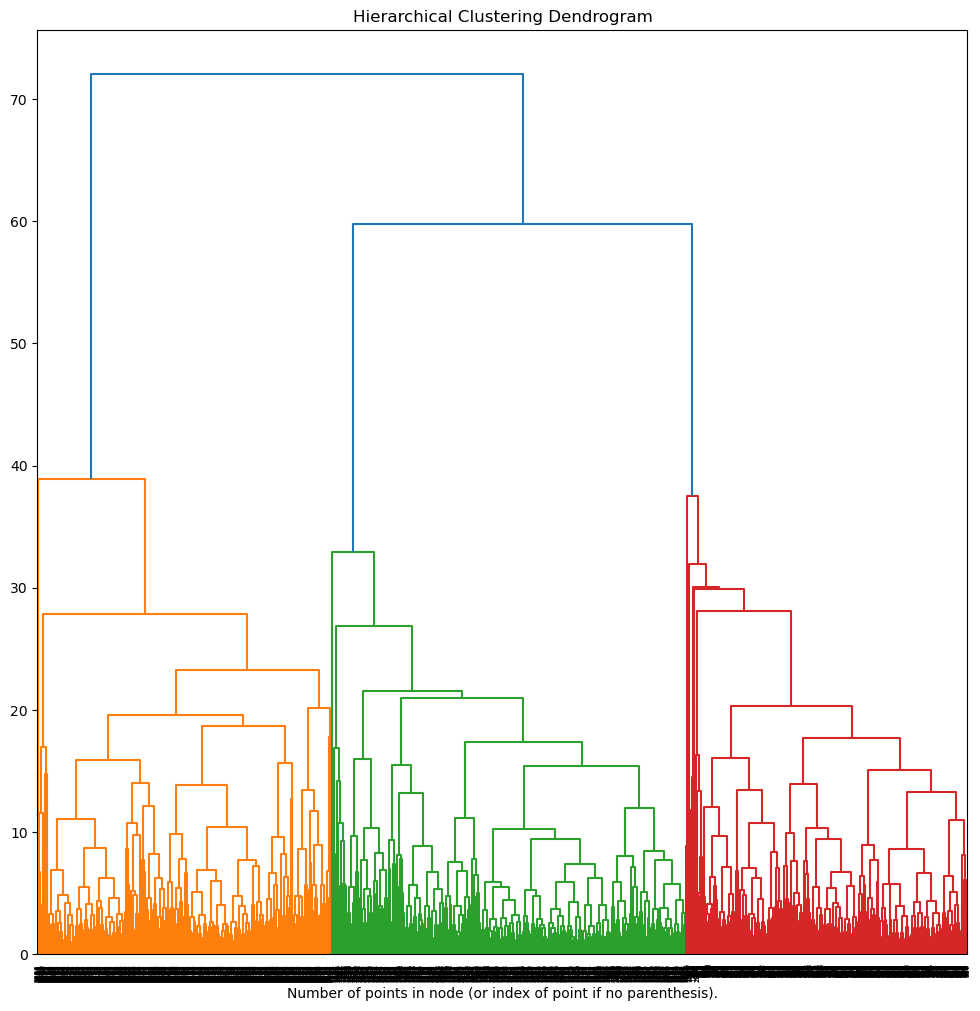

Temps de calcul pour la variante average : 145.48 ms
---------------------------------------------------
ward linkage


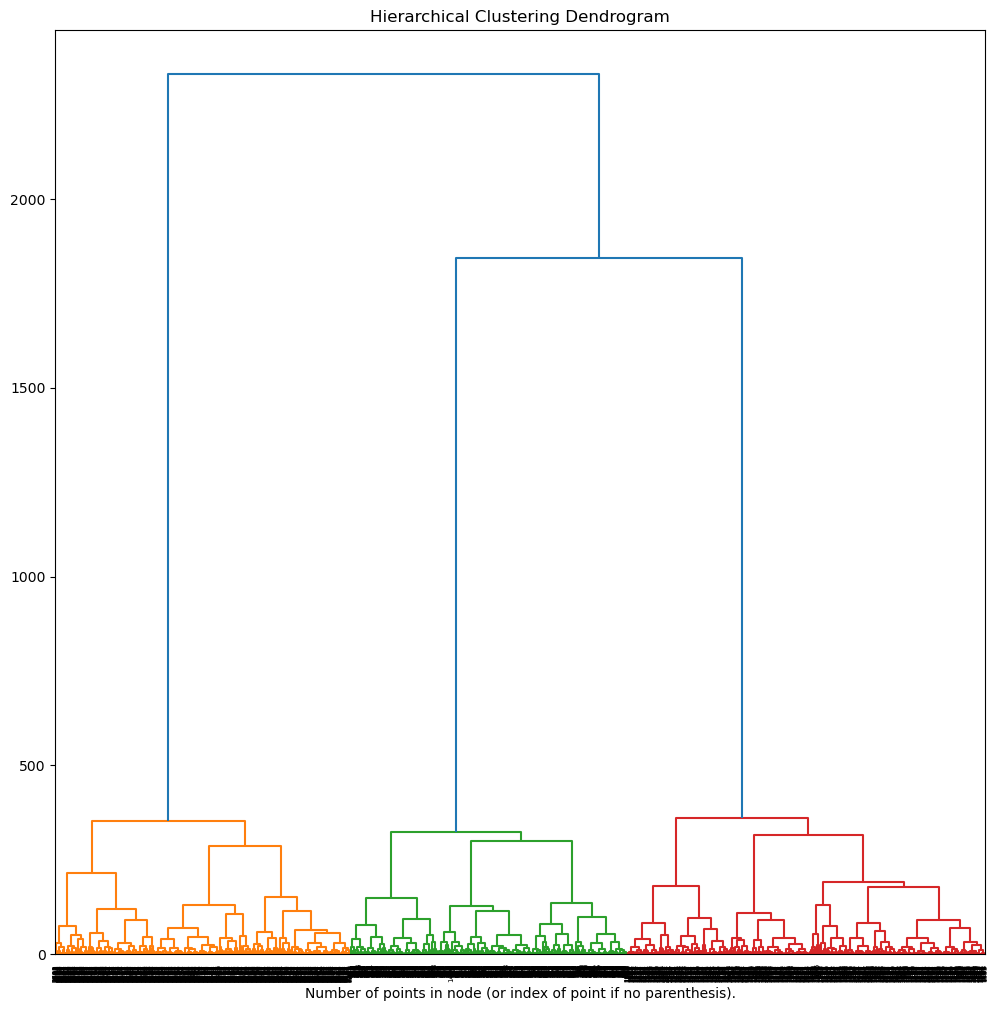

Temps de calcul pour la variante ward : 169.9 ms


In [37]:
name = "xclara.arff"
datanp = get_data(path,name)
for link in variantes_linkage:
    print('---------------------------------------------------');
    print(f"{link} linkage")
    # setting distance_threshold=0 ensures we compute the full tree.
    time_start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=0, linkage=link, n_clusters=None)
    
    model = model.fit(datanp)
    time_stop = time.time()
    plt.figure(figsize=(12, 12))
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top p levels of the dendrogram
    plot_dendrogram(model) #, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    print(f"Temps de calcul pour la variante {link} : {(round((time_stop - time_start)*1000,2))} ms" )

### 3-spiral.arff


---------------------------------------
Affichage données initiales            3-spiral.arff


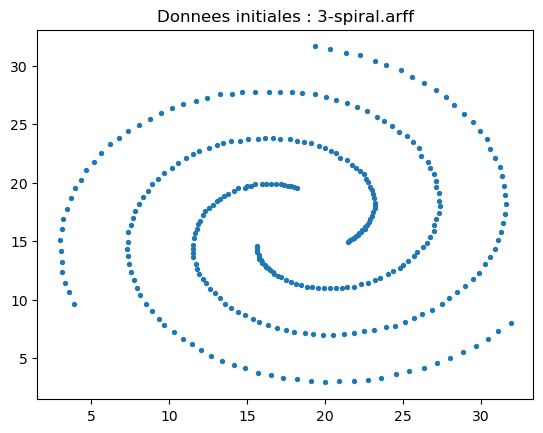

In [38]:
name = "3-spiral.arff"
datanp = get_data('./artificial/', name )
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

---------------------------------------------------
single linkage


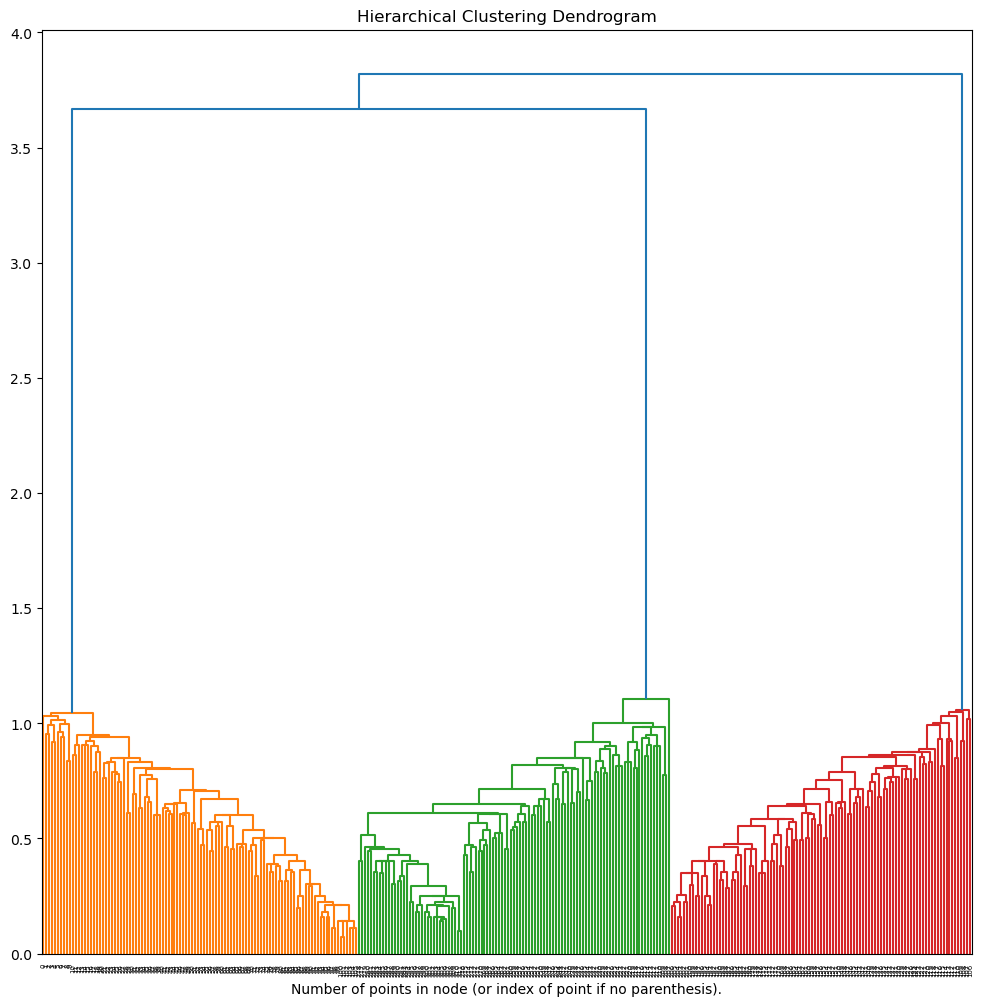

Temps de calcul pour la variante single : 0.0 ms
---------------------------------------------------
complete linkage


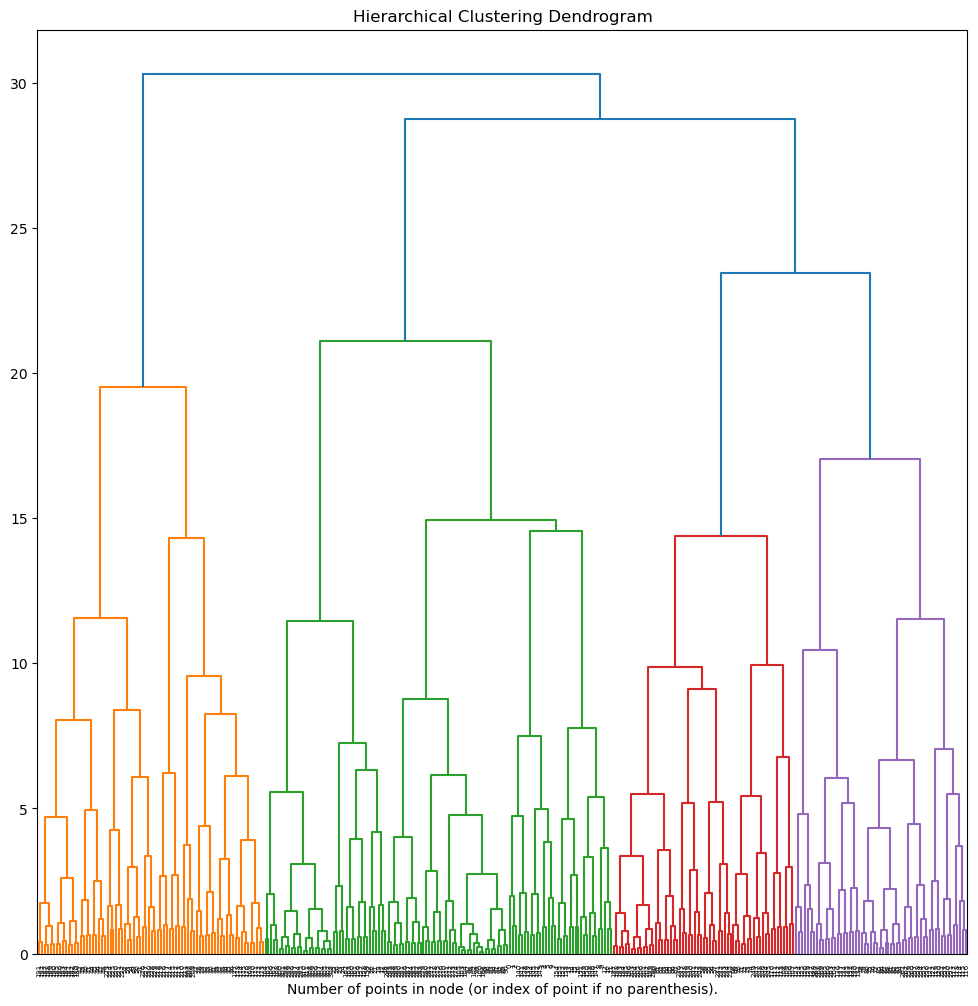

Temps de calcul pour la variante complete : 0.0 ms
---------------------------------------------------
average linkage


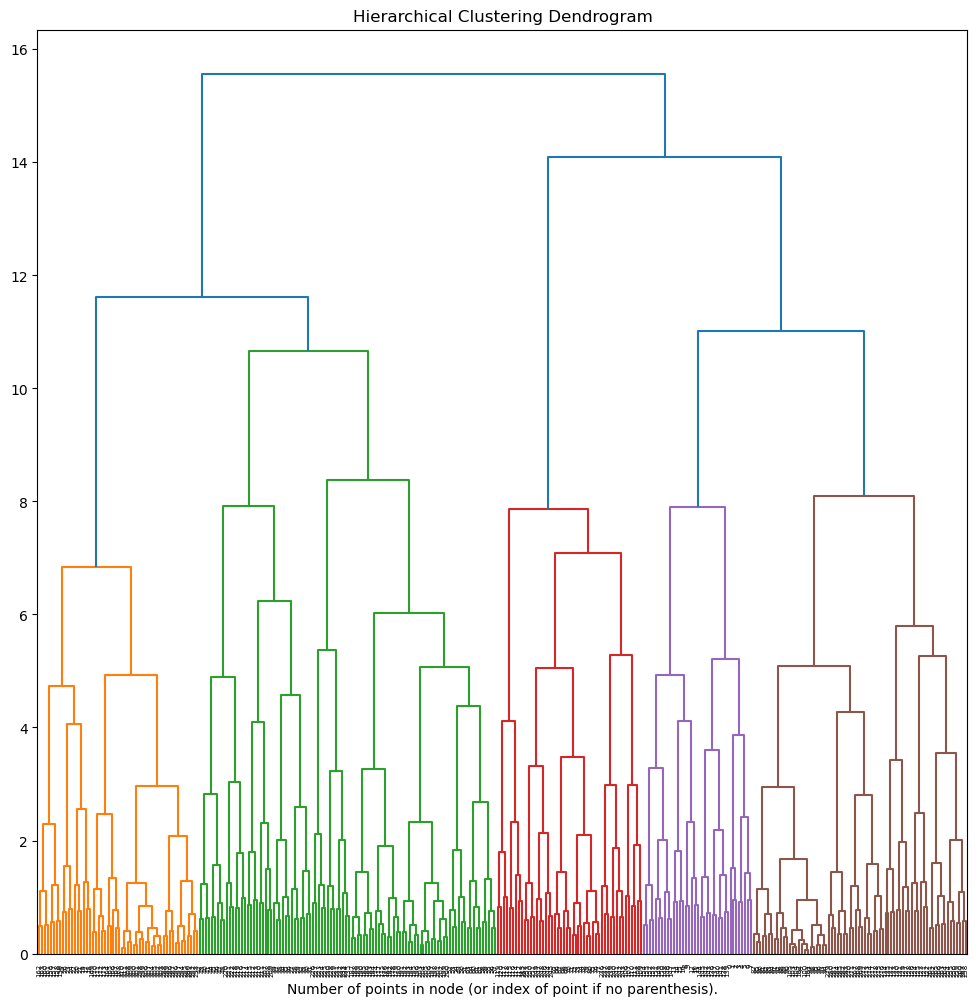

Temps de calcul pour la variante average : 2.95 ms
---------------------------------------------------
ward linkage


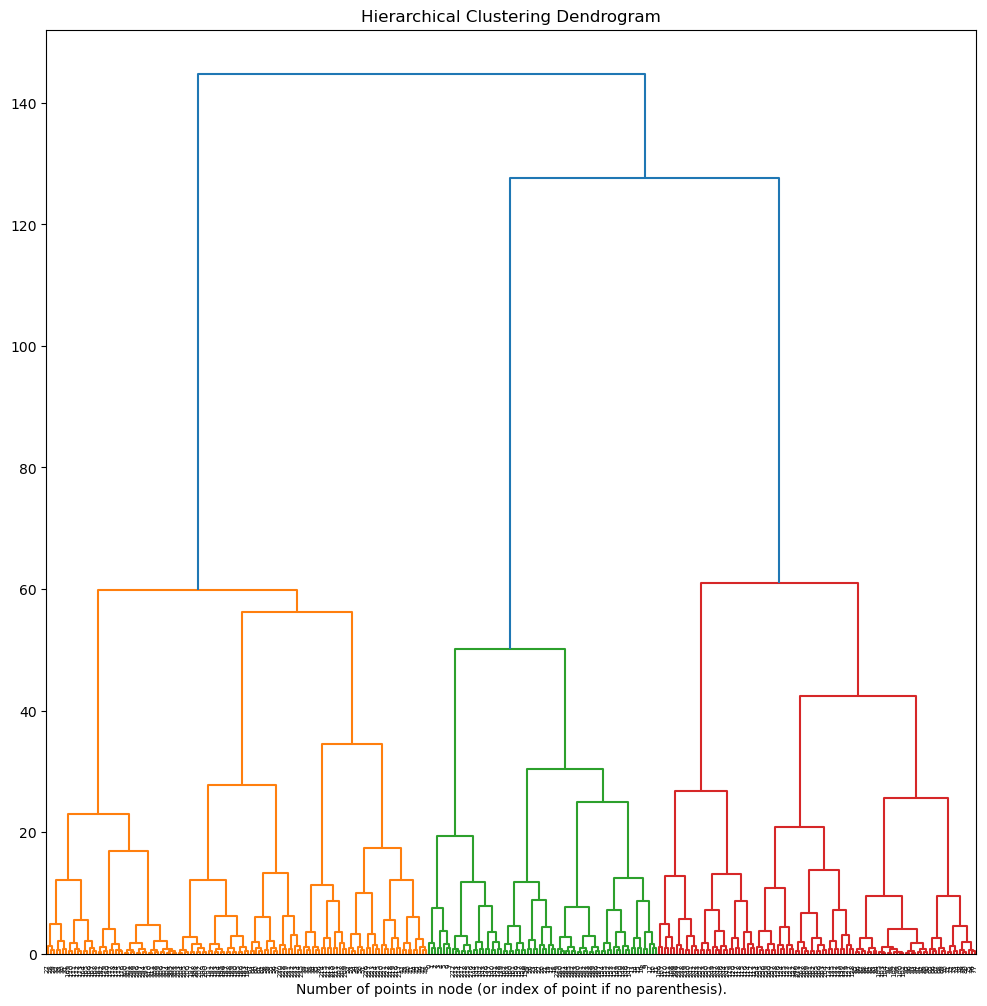

Temps de calcul pour la variante ward : 0.0 ms


In [39]:
name = "3-spiral.arff"
datanp = get_data(path,name)
for link in variantes_linkage:
    print('---------------------------------------------------');
    print(f"{link} linkage")
    # setting distance_threshold=0 ensures we compute the full tree.
    time_start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=0, linkage=link, n_clusters=None)
    
    model = model.fit(datanp)
    time_stop = time.time()
    plt.figure(figsize=(12, 12))
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top p levels of the dendrogram
    plot_dendrogram(model) #, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    print(f"Temps de calcul pour la variante {link} : {(round((time_stop - time_start)*1000,2))} ms" )

## Recherche du meilleur nombre de clusters grâce à l'indice de Calinski-Harabasz

#### 3-spiral.arff

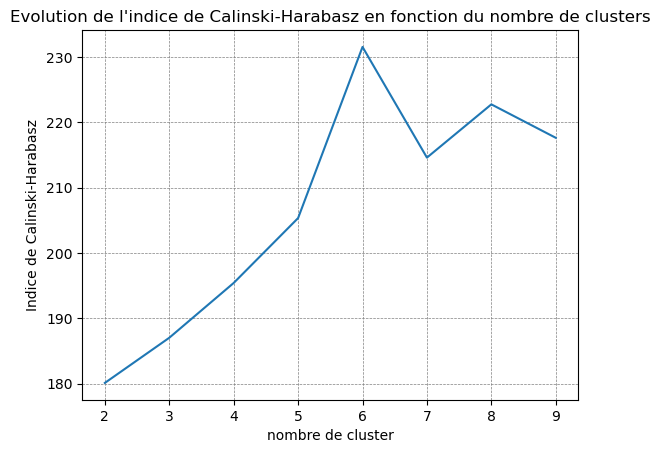

In [40]:
name = "3-spiral.arff"
datanp = get_data(path,name)
score_list = []
x= np.arange(2,10,1)

for nb_cluster in x:
    model = cluster.AgglomerativeClustering(distance_threshold=None, linkage='average', n_clusters=nb_cluster)
    model.fit(datanp)
    score = metrics.calinski_harabasz_score(datanp, model.labels_)
    score_list.append(score)

plt.plot(x, score_list, label = "Inertie")
plt.title("Evolution de l'indice de Calinski-Harabasz en fonction du nombre de clusters")
plt.xlabel('nombre de cluster')
plt.ylabel('Indice de Calinski-Harabasz')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

---------------------------------------
Affichage données initiales            3-spiral.arff


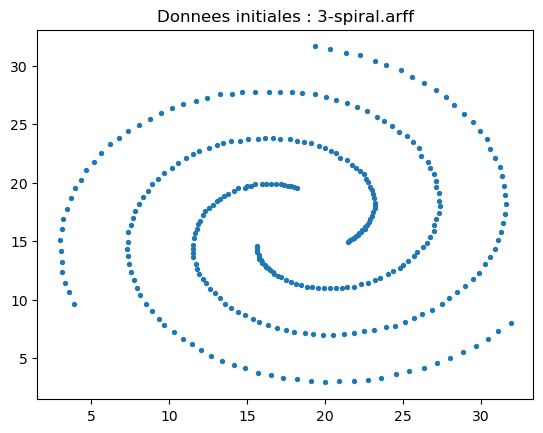

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


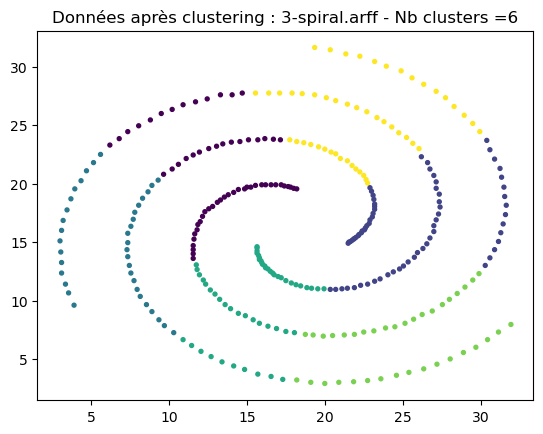

In [41]:
## Meilleur score de Calinski-Harabasz
name = "3-spiral.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=None, linkage='average', n_clusters=6)
model.fit(datanp)
print_clustering(model,datanp,name)

#### xclara.arff

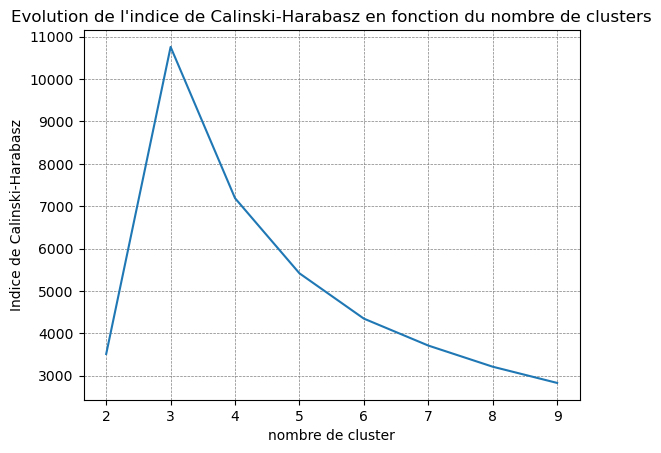

In [42]:
name = "xclara.arff"
datanp = get_data(path,name)
score_list = []
x= np.arange(2,10,1)

for nb_cluster in x:
    model = cluster.AgglomerativeClustering(distance_threshold=None, linkage='average', n_clusters=nb_cluster)
    model.fit(datanp)
    score = metrics.calinski_harabasz_score(datanp, model.labels_)
    score_list.append(score)

plt.plot(x, score_list, label = "Inertie")
plt.title("Evolution de l'indice de Calinski-Harabasz en fonction du nombre de clusters")
plt.xlabel('nombre de cluster')
plt.ylabel('Indice de Calinski-Harabasz')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

---------------------------------------
Affichage données initiales            xclara.arff


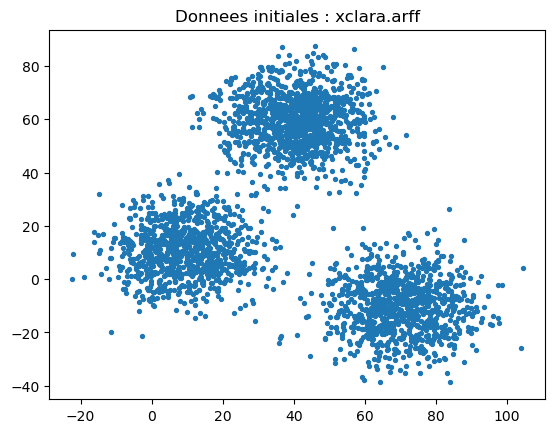

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


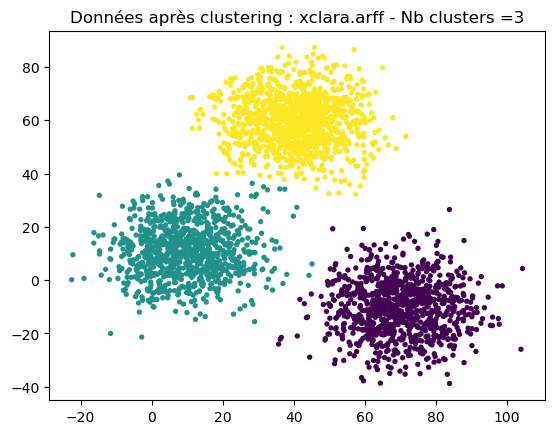

In [43]:
## Meilleur score de Calinski-Harabasz
name = "xclara.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=None, linkage='average', n_clusters=3)
model.fit(datanp)
print_clustering(model,datanp,name)

### 3.3 Intérêts et Limites du clustering agglomératif

#### Bon fonctionnement

---------------------------------------
Affichage données initiales            2d-4c.arff


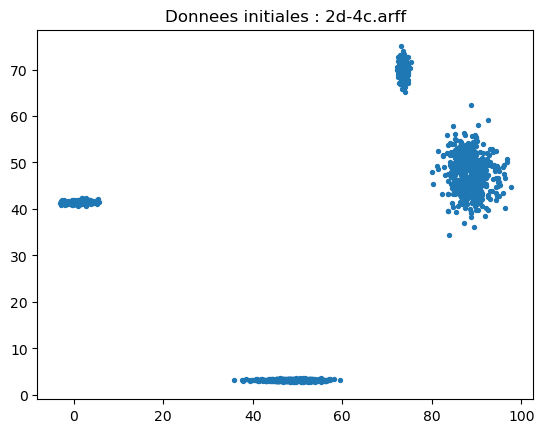

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


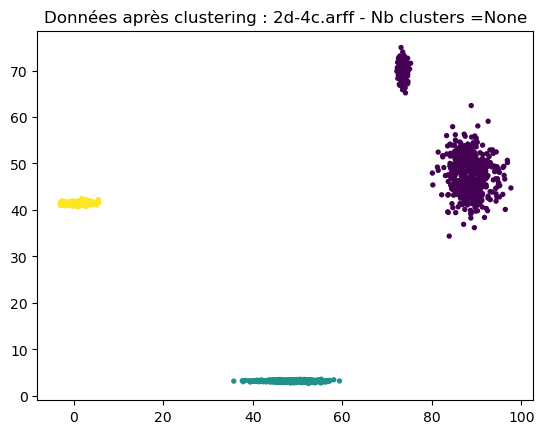

In [44]:
name="2d-4c.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=45, linkage='average', n_clusters=None)
model.fit(datanp)
print_clustering(model,datanp,name)

---------------------------------------
Affichage données initiales            s-set1.arff


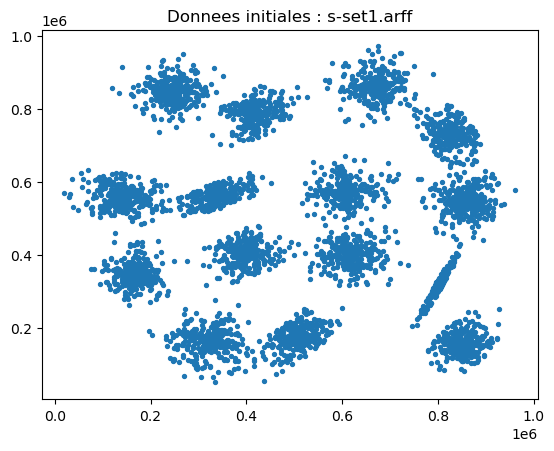

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


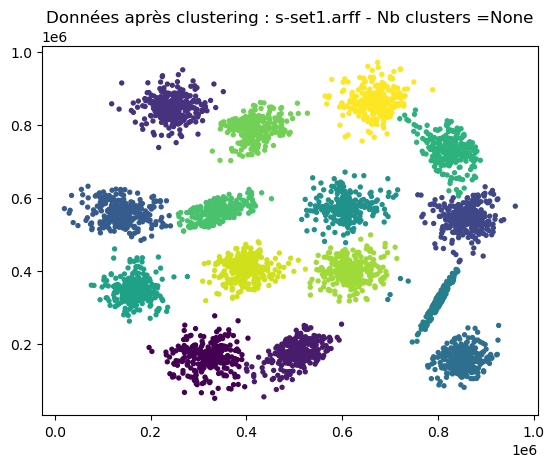

In [45]:
name = "s-set1.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=140000, linkage='average', n_clusters=None)
model.fit(datanp)
print_clustering(model,datanp,name)

#### Mauvais fonctionnement

---------------------------------------
Affichage données initiales            sizes2.arff


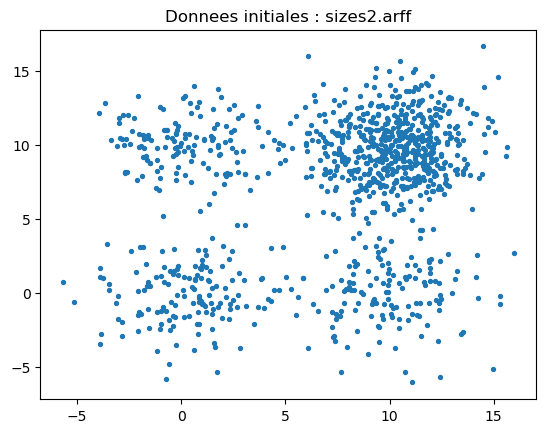

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


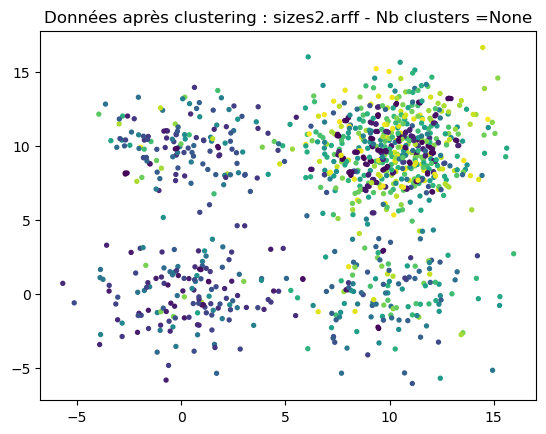

In [46]:
name = "sizes2.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=0.1, linkage='single', n_clusters=None)
model.fit(datanp)
print_clustering(model,datanp,name)

---------------------------------------
Affichage données initiales            bruit.arff


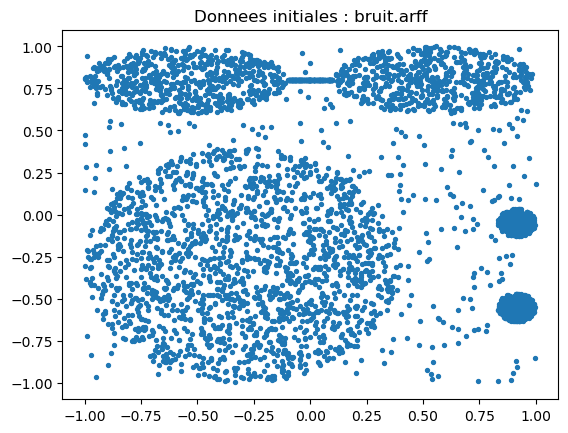

------------------------------------------------------
Affichage après appel KMeans pour une valeur de k fixée


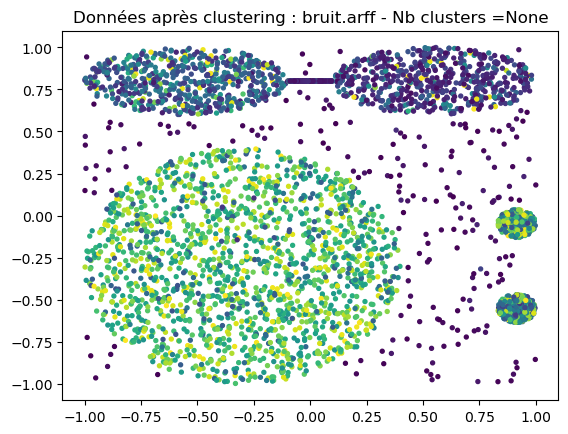

In [47]:
name = "bruit.arff"
datanp = get_data(path,name)
model = cluster.AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)
model.fit(datanp)
print_clustering(model,datanp,name)